In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import joblib



In [9]:
# Step 2: Load the dataset
df = pd.read_csv("fruit_classification_dataset.csv")

# Show first 5 rows
print(" First few rows of the dataset:")
print(df.head())

# Check shape and info
print("\nDataset shape:", df.shape)
print("\nInformation about dataset:")
print(df.info())


 First few rows of the dataset:
   size (cm)  shape  weight (g)  avg_price (₹)   color  taste     fruit_name
0       25.4  round      3089.2          137.1   green  sweet     watermelon
1       24.6  round      3283.9          163.8   green  sweet     watermelon
2        7.8  round       319.0           91.3   green  sweet  custard apple
3       20.0   oval      1607.0           85.7  orange  sweet         papaya
4       10.2   long       131.5           37.8  yellow  sweet         banana

Dataset shape: (10000, 7)

Information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      10000 non-null  float64
 1   shape          10000 non-null  object 
 2   weight (g)     10000 non-null  float64
 3   avg_price (₹)  10000 non-null  float64
 4   color          10000 non-null  object 
 5   taste          10000 non-null  

In [10]:
# Step 3: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

print("\nAfter removing duplicates, dataset shape:", df.shape)


Missing values in each column:
size (cm)        0
shape            0
weight (g)       0
avg_price (₹)    0
color            0
taste            0
fruit_name       0
dtype: int64

After removing duplicates, dataset shape: (9754, 7)



Statistical summary:
         size (cm)   weight (g)  avg_price (₹)
count  9754.000000  9754.000000    9754.000000
mean      8.611195   466.779209      78.423621
std       6.372831   737.286782      38.324394
min       0.900000     4.500000       9.000000
25%       4.000000    47.600000      49.000000
50%       7.300000   177.200000      76.300000
75%      10.200000   375.650000     101.700000
max      27.500000  3299.800000     165.000000


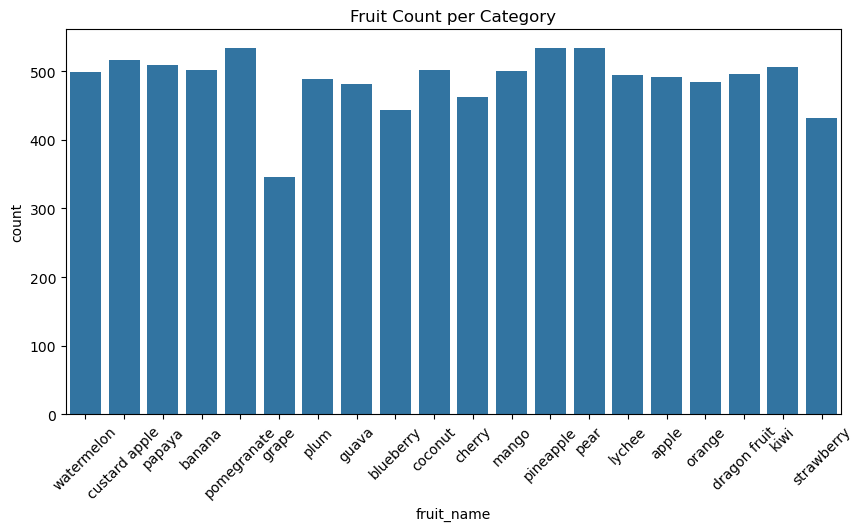

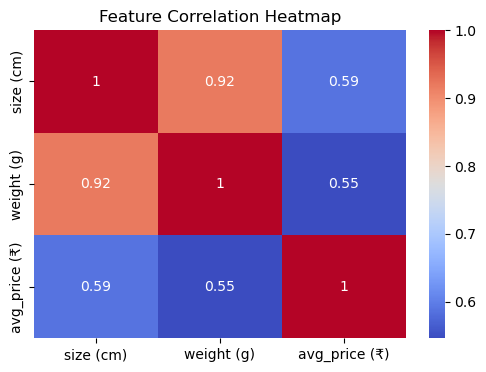

In [11]:
# Step 4: Basic statistical summary
print("\nStatistical summary:")
print(df.describe())

# Check target column distribution
plt.figure(figsize=(10,5))
sns.countplot(x='fruit_name', data=df)
plt.title("Fruit Count per Category")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
# Step 5: Split into features and target
X = df.drop(columns=['fruit_name'])
y = df['fruit_name']

# Identify column types
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()

# Encode categorical features
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

# Scale numeric features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Encode target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)


In [13]:
# Step 6: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (7803, 6)
Testing shape: (1951, 6)



Model Accuracy: 1.0

Classification Report:
                precision    recall  f1-score   support

        apple       1.00      1.00      1.00        98
       banana       1.00      1.00      1.00       101
    blueberry       1.00      1.00      1.00        89
       cherry       1.00      1.00      1.00        92
      coconut       1.00      1.00      1.00       100
custard apple       1.00      1.00      1.00       103
 dragon fruit       1.00      1.00      1.00        99
        grape       1.00      1.00      1.00        69
        guava       1.00      1.00      1.00        96
         kiwi       1.00      1.00      1.00       101
       lychee       1.00      1.00      1.00        99
        mango       1.00      1.00      1.00       100
       orange       1.00      1.00      1.00        97
       papaya       1.00      1.00      1.00       102
         pear       1.00      1.00      1.00       107
    pineapple       1.00      1.00      1.00       107
         plum     

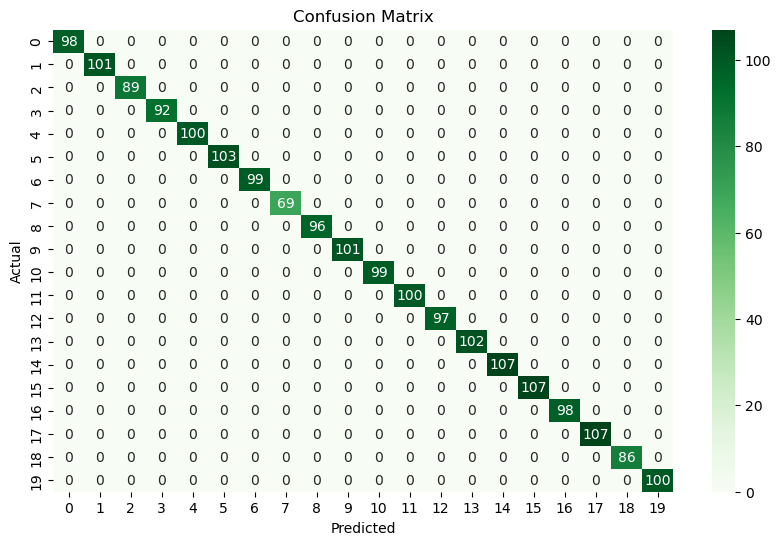

In [15]:
# Step 8: Model Evaluation
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Confusion matrix visualization
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


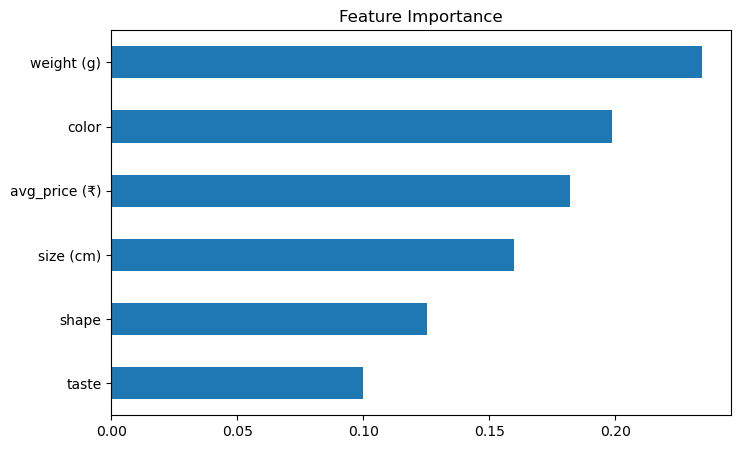

In [16]:
# Step 9: Feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,5), title="Feature Importance")
plt.show()


In [17]:
# Step 10: Save model and encoders
import os
os.makedirs("fruits_model", exist_ok=True)

joblib.dump(model, "fruits_model/fruit_model.pkl")
joblib.dump(encoders, "fruits_model/encoders.pkl")
joblib.dump(scaler, "fruits_model/scaler.pkl")
joblib.dump(target_encoder, "fruits_model/target_encoder.pkl")

print(" Model and encoders saved successfully!")


 Model and encoders saved successfully!
